In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing

In [2]:
data_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
data_path

'C:\\Users\\iad7kor\\.keras\\datasets\\auto-mpg.data'

In [3]:
colomn = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Accelaration", "Model year", "origin"]

In [4]:
dataset = pd.read_csv(data_path, names = colomn, na_values="?", comment="\t", sep =" ", skipinitialspace=True)

In [5]:
df = dataset.copy()

In [6]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [7]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Accelaration    0
Model year      0
origin          0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
df.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [13]:
train = df.sample(frac=0.8, random_state=0)
test = df.drop(train.index)

In [14]:
train.shape

(314, 8)

In [15]:
test.shape

(78, 8)

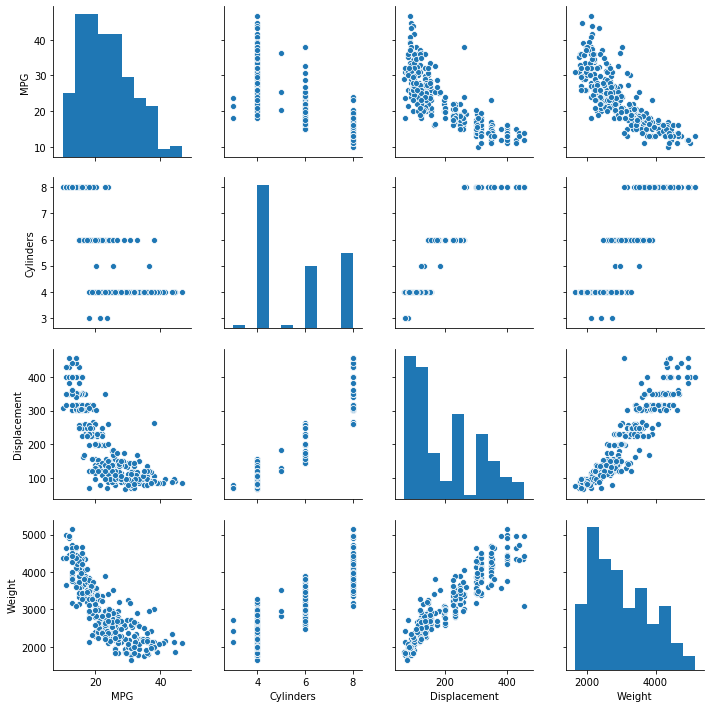

In [16]:
sns.pairplot(train[["MPG", "Cylinders", "Displacement", "Weight"]])

In [17]:
stats = train.describe()
stats.pop("MPG")
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Accelaration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0


In [18]:
train_labels = train.pop("MPG")
test_labels = test.pop("MPG")


# Normalize the data

In [20]:
def normalize(x):
    return (x - stats["mean"])/ stats["std"]
normalized_train_data = normalize(train).values
normalized_test_data = normalize(test).values
    

In [59]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = tf.nn.relu, input_shape = [len(train.keys())]),
        layers.Dense(64, activation = tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss = "mse",
                 optimizer = optimizer,
                 metrics = ["mae", "mse"]
                 )
    return model

In [60]:
model = build_model()

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [62]:
ex = normalized_train_data[:10]
res = model.predict(ex)
res

array([[ 0.06142807],
       [ 0.22836582],
       [-0.4973408 ],
       [ 0.4176406 ],
       [ 0.04272758],
       [-0.17990027],
       [ 0.05025699],
       [-0.36888304],
       [-0.11981608],
       [-0.23174427]], dtype=float32)

In [63]:
EPOCHS = 1000
history = model.fit(normalized_train_data, train_labels,
                   epochs = EPOCHS, validation_split=0.15, verbose = 0
                   )


In [64]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,3.615680,1.228871,3.615680,10.335974,2.306987,10.335975,995
996,3.559772,1.225446,3.559773,9.824525,2.201094,9.824525,996
997,3.665736,1.256648,3.665736,9.959332,2.250791,9.959332,997
998,3.692657,1.274729,3.692657,10.203759,2.260498,10.203758,998
999,3.505402,1.177481,3.505402,10.185625,2.259056,10.185624,999


In [65]:
import matplotlib.pyplot as plt

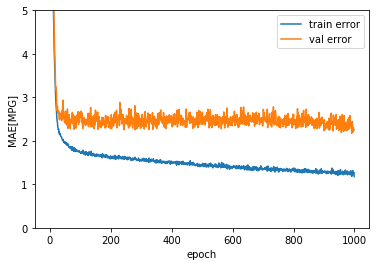

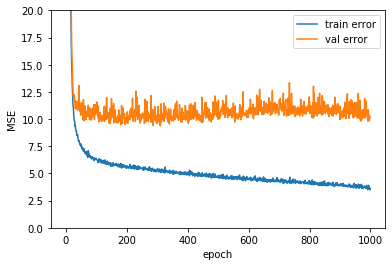

In [66]:
def plot_hisory(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch
    
    plt.figure()
    plt.xlabel("epoch")
    plt.ylabel("MAE[MPG]")
    plt.plot(hist["epoch"], hist["mean_absolute_error"], label = "train error")
    plt.plot(hist["epoch"], hist["val_mean_absolute_error"], label = "val error")
    plt.legend()
    plt.ylim([0,5])
    plt.figure()
    plt.xlabel("epoch")
    plt.ylabel("MSE")
    plt.plot(hist["epoch"], hist["mean_squared_error"], label = "train error")
    plt.plot(hist["epoch"], hist["val_mean_squared_error"], label = "val error")
    plt.legend()
    plt.ylim([0,20])
plot_hisory(history)

#early stopping


In [69]:
model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)


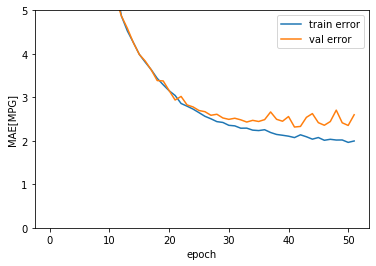

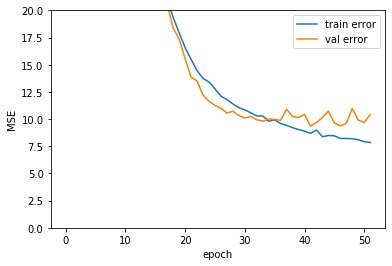

In [71]:
history = model.fit(normalized_train_data, train_labels,
                   epochs = EPOCHS, validation_split=0.15, verbose = 0,
                    callbacks = [early_stop]
                   )
plot_hisory(history)

In [73]:
loss, mae, mse = model.evaluate(normalized_test_data, test_labels, verbose = 0)

In [74]:
mae

1.9035865

# make Predictions

In [76]:
test_pred = model.predict(normalized_test_data).flatten()

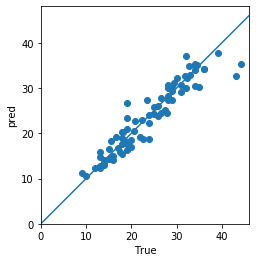

In [80]:
plt.scatter(test_labels, test_pred)
plt.xlabel("True")
plt.ylabel("pred")
plt.axis("equal")
plt.axis("square")
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

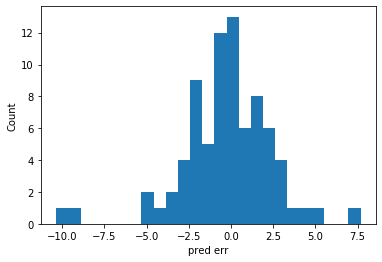

In [82]:
errors = test_pred - test_labels
plt.hist(errors, bins = 25)
plt.xlabel("pred err")
_ = plt.ylabel("Count")